In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [10]:
obj_df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [11]:
obj_df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [12]:
obj_df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [13]:
obj_df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [14]:
obj_df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [17]:
cleanup = {"Sex":  {"M": 0, "F": 1},
          "ChestPainType" : {"ASY" : 0, "NAP" : 1, "ATA": 2, "TA" : 3},
          "RestingECG": {"Normal" : 0, "LVH": 1, "ST": 2},
          "ExerciseAngina": {"N": 0, "Y": 1},
          "ST_Slope":{"Flat": 0, "Up":1, "Down":2}}

In [18]:
obj_df = obj_df.replace(cleanup)
obj_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,0,2,0,0,1
1,1,1,0,0,0
2,0,2,2,0,1
3,1,0,0,1,0
4,0,1,0,0,1


In [19]:
df = df.replace(cleanup)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(df.drop('HeartDisease',axis=1))

StandardScaler()

In [24]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis=1))

In [25]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,-0.515952,1.345086,0.410909,0.825070,-0.551341,-0.747055,1.382928,-0.823556,-0.832432,0.699073
1,-0.478484,1.938163,0.270422,1.491752,-0.171961,-0.551341,-0.747055,0.754157,-0.823556,0.105664,-0.917423
2,-1.751359,-0.515952,1.345086,-0.129513,0.770188,-0.551341,1.774257,-1.525138,-0.823556,-0.832432,0.699073
3,-0.584556,1.938163,-0.804242,0.302825,0.139040,-0.551341,-0.747055,-1.132156,1.214246,0.574711,-0.917423
4,0.051881,-0.515952,0.270422,0.951331,-0.034755,-0.551341,-0.747055,-0.581981,-0.823556,-0.832432,0.699073


In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['HeartDisease'],
                                                    test_size=0.30)

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
pred = knn.predict(X_test)

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['HeartDisease'],cv=10)
    accuracy_rate.append(score.mean())

In [32]:
accuracy_rate

[0.8027830864787386,
 0.7919015766841854,
 0.8408743430482561,
 0.8201624462494028,
 0.8485308170090778,
 0.8332895365504062,
 0.8419612995699952,
 0.8354395604395604,
 0.8474080267558529,
 0.8375895843287147,
 0.8517558528428093,
 0.8408504538939322,
 0.8517797419971332,
 0.8473960821786909,
 0.848506927854754,
 0.8441471571906355,
 0.84848303870043,
 0.8386884854276158,
 0.8463091256569516,
 0.8408743430482561,
 0.8517797419971332,
 0.848494983277592,
 0.8528547539417104,
 0.8430363115145724,
 0.8506808408982321,
 0.84089823220258,
 0.8408862876254182,
 0.8365145723841376,
 0.8430482560917344,
 0.838676540850454,
 0.84848303870043,
 0.8430363115145724,
 0.8495699952221691,
 0.8419493549928333,
 0.8452341137123746,
 0.8441232680363114,
 0.8473960821786909,
 0.8430124223602485,
 0.8451982799808887]

In [36]:
np.argmax(accuracy_rate)


22

In [37]:
accuracy_rate[22]

0.8528547539417104

## k=23 has Highest Accuracy

Text(0, 0.5, 'Accuracy Rate')

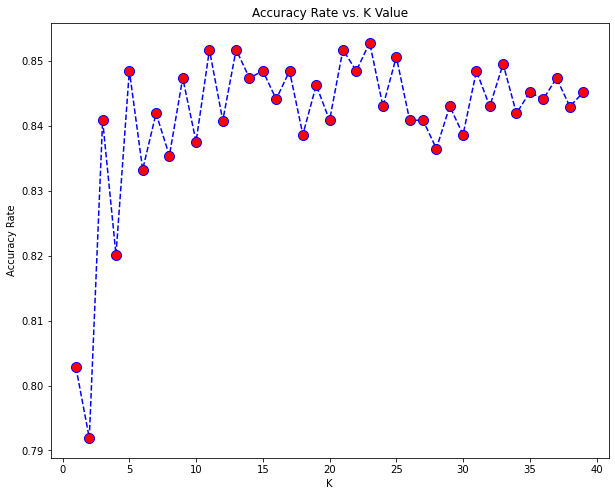

In [40]:
plt.figure(figsize=(10,8))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')